In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from sklearn.preprocessing import LabelEncoder
from TS import ThompsonSampling
import contextualbandits
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import beta

In [2]:
%load_ext autoreload
%autoreload 2

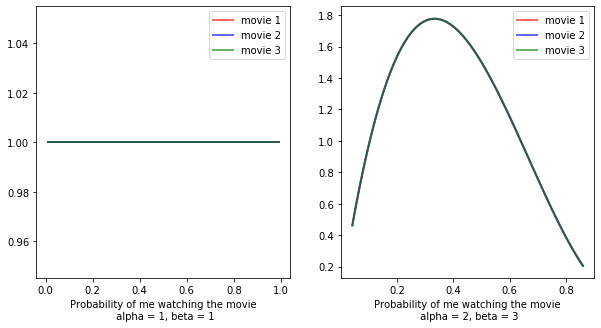

In [3]:
def graph_pdf(a, b, color = 'r-', label='action', ax = None):
    x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b),
            color, lw=2, alpha=0.6, label=label)

fig, ax= plt.subplots(1, 2, figsize=(10, 5))
graph_pdf(1, 1, label='movie 1', ax = ax[0])
graph_pdf(1, 1, color = 'b-', label='movie 2', ax = ax[0])
graph_pdf(1, 1, color = 'g-', label='movie 3', ax = ax[0])
ax[0].set_xlabel("Probability of me watching the movie\n alpha = 1, beta = 1")
ax[0].legend()

graph_pdf(2, 3, label='movie 1', ax = ax[1])
graph_pdf(2, 3, color = 'b-', label='movie 2', ax = ax[1])
graph_pdf(2, 3, color = 'g-', label='movie 3', ax = ax[1])
ax[1].set_xlabel("Probability of me watching the movie\n alpha = 2, beta = 3")
ax[1].legend()
plt.show()

In [16]:
ts23 = ThompsonSampling([2, 2, 2], [3, 3, 3], T = 5, N_arm = 3)
ts23.run_simulation()
print(ts23.alpha)
print(ts23.beta)

[5 2 2]
[3 4 4]


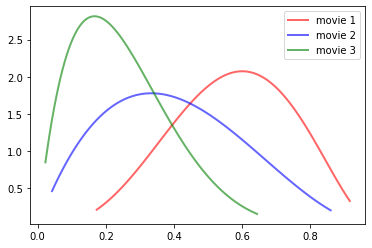

In [12]:
graph_pdf(5, 3, label='movie 1', ax = plt)
graph_pdf(2, 3, color = 'b-', label='movie 2', ax = plt)
graph_pdf(2, 6, color = 'g-', label='movie 3', ax = plt)
plt.legend()
plt.show()

In [22]:
ts11 = ThompsonSampling([1, 1, 1], [1, 1, 1], T = 5, N_arm = 3)
ts11.run_simulation()
print(ts11.alpha)
print(ts11.beta)
# graph_pdf(15, 1, label='movie 1', ax = plt)
# graph_pdf(4, 2, color = 'b-', label='movie 2', ax = plt)
# graph_pdf(1, 3, color = 'g-', label='movie 3', ax = plt)
# plt.legend()
# plt.show()

[5 2 1]
[1 1 1]


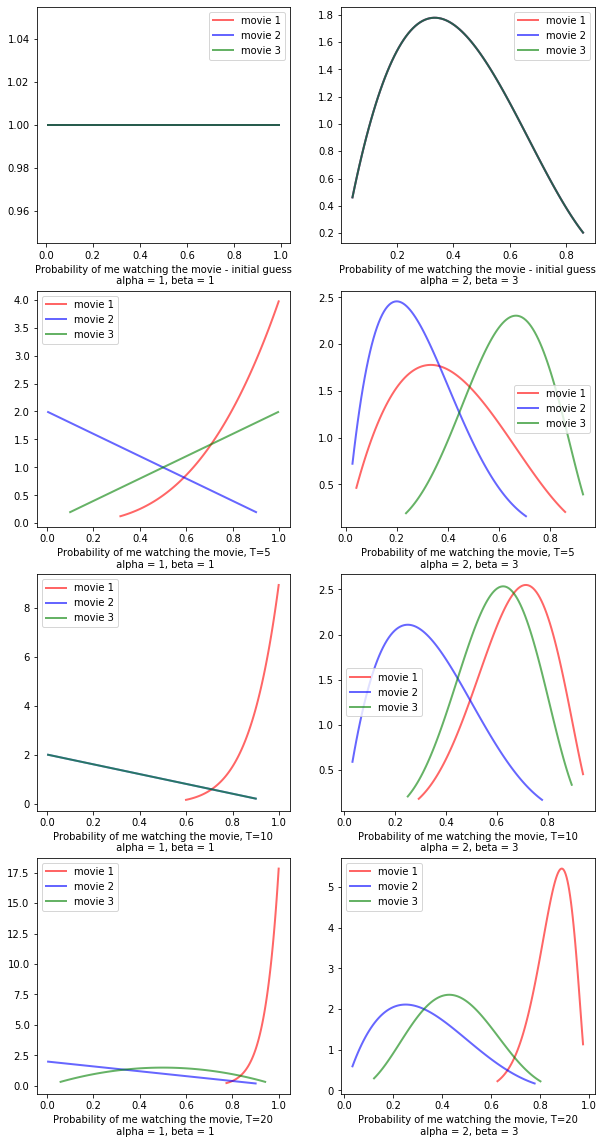

In [31]:
ts11 = ThompsonSampling([1, 1, 1], [1, 1, 1], T = 5, N_arm = 3)
ts11.run_simulation()
ts23 = ThompsonSampling([2, 2, 2], [3, 3, 3], T = 5, N_arm = 3)
ts23.run_simulation()

ts11_10 = ThompsonSampling([1, 1, 1], [1, 1, 1], T = 10, N_arm = 3)
ts11_10.run_simulation()
ts23_10 = ThompsonSampling([2, 2, 2], [3, 3, 3], T = 10, N_arm = 3)
ts23_10.run_simulation()

ts11_20 = ThompsonSampling([1, 1, 1], [1, 1, 1], T = 20, N_arm = 3)
ts11_20.run_simulation()
ts23_20 = ThompsonSampling([2, 2, 2], [3, 3, 3], T = 20, N_arm = 3)
ts23_20.run_simulation()

fig, ax= plt.subplots(4, 2, figsize=(10, 20))
graph_pdf(1, 1, label='movie 1', ax = ax[0][0])
graph_pdf(1, 1, color = 'b-', label='movie 2', ax = ax[0][0])
graph_pdf(1, 1, color = 'g-', label='movie 3', ax = ax[0][0])
ax[0][0].set_xlabel("Probability of me watching the movie - initial guess\n alpha = 1, beta = 1")
ax[0][0].legend()

graph_pdf(2, 3, label='movie 1', ax = ax[0][1])
graph_pdf(2, 3, color = 'b-', label='movie 2', ax = ax[0][1])
graph_pdf(2, 3, color = 'g-', label='movie 3', ax = ax[0][1])
ax[0][1].set_xlabel("Probability of me watching the movie - initial guess\n alpha = 2, beta = 3")
ax[0][1].legend()

graph_pdf(ts23.alpha[0], ts23.beta[0], label='movie 1', ax = ax[1][1])
graph_pdf(ts23.alpha[1], ts23.beta[1], color = 'b-', label='movie 2', ax = ax[1][1])
graph_pdf(ts23.alpha[2], ts23.beta[2], color = 'g-', label='movie 3', ax = ax[1][1])
ax[1][1].set_xlabel("Probability of me watching the movie, T=5\n alpha = 2, beta = 3")
ax[1][1].legend()

graph_pdf(ts11.alpha[0], ts11.beta[0], label='movie 1', ax = ax[1][0])
graph_pdf(ts11.alpha[1], ts11.beta[1], color = 'b-', label='movie 2', ax = ax[1][0])
graph_pdf(ts11.alpha[2], ts11.beta[2], color = 'g-', label='movie 3', ax = ax[1][0])
ax[1][0].set_xlabel("Probability of me watching the movie, T=5\n alpha = 1, beta = 1")
ax[1][0].legend()

graph_pdf(ts23_10.alpha[0], ts23_10.beta[0], label='movie 1', ax = ax[2][1])
graph_pdf(ts23_10.alpha[1], ts23_10.beta[1], color = 'b-', label='movie 2', ax = ax[2][1])
graph_pdf(ts23_10.alpha[2], ts23_10.beta[2], color = 'g-', label='movie 3', ax = ax[2][1])
ax[2][1].set_xlabel("Probability of me watching the movie, T=10\n alpha = 2, beta = 3")
ax[2][1].legend()

graph_pdf(ts11_10.alpha[0], ts11_10.beta[0], label='movie 1', ax = ax[2][0])
graph_pdf(ts11_10.alpha[1], ts11_10.beta[1], color = 'b-', label='movie 2', ax = ax[2][0])
graph_pdf(ts11_10.alpha[2], ts11_10.beta[2], color = 'g-', label='movie 3', ax = ax[2][0])
ax[2][0].set_xlabel("Probability of me watching the movie, T=10\n alpha = 1, beta = 1")
ax[2][0].legend()

graph_pdf(ts23_20.alpha[0], ts23_20.beta[0], label='movie 1', ax = ax[3][1])
graph_pdf(ts23_20.alpha[1], ts23_20.beta[1], color = 'b-', label='movie 2', ax = ax[3][1])
graph_pdf(ts23_20.alpha[2], ts23_20.beta[2], color = 'g-', label='movie 3', ax = ax[3][1])
ax[3][1].set_xlabel("Probability of me watching the movie, T=20\n alpha = 2, beta = 3")
ax[3][1].legend()

graph_pdf(ts11_20.alpha[0], ts11_20.beta[0], label='movie 1', ax = ax[3][0])
graph_pdf(ts11_20.alpha[1], ts11_20.beta[1], color = 'b-', label='movie 2', ax = ax[3][0])
graph_pdf(ts11_20.alpha[2], ts11_20.beta[2], color = 'g-', label='movie 3', ax = ax[3][0])
ax[3][0].set_xlabel("Probability of me watching the movie, T=20\n alpha = 1, beta = 1")
ax[3][0].legend()
plt.show()